In [ ]:
import torch
import torch.nn as nn
import numpy as np

### Elementary stuffs

In [ ]:
# tensors

x = torch.ones([2,2,3],dtype=torch.float16)

print(x.size())

# get tensor from a list
arr = [2,3,4]
x = torch.tensor(arr)

# add and basic ops
A = torch.randn([2,2])
B = torch.randn([2,2])

C = A + B
print(C) 

C = torch.add(A,B) # same as A+B
print(C)

C.sub_(C) # in-place: x -= y 
print(C)

torch.Size([2, 2, 3])
tensor([[ 0.2677,  0.1813],
        [-0.0881, -0.0755]])
tensor([[ 0.2677,  0.1813],
        [-0.0881, -0.0755]])
tensor([[0., 0.],
        [0., 0.]])


In [ ]:
# slicing ops

A = torch.tensor([[1,2,3],
                  [4,5,6]])

print(A[:,1]) # all rows of 2nd column
print(A[0,:]) # all columns of 1st row

tensor([2, 5])
tensor([1, 2, 3])


In [ ]:
# reshaping  tensors: view() method

x = torch.randn(4,4)
print(x)

y = x.view(16) # reshaping to a Nx1 tensor
print(y)

y = x.view(-1,2) # specifying the column dimension only: 2x8
print(y)

y = x.view(-1,16) # 1x16
print(y)

tensor([[ 0.1400,  0.4221,  1.1614, -0.1205],
        [-0.4425, -0.5927, -0.5093, -1.6669],
        [-0.0986,  0.2028, -0.9924,  0.2785],
        [ 0.4964,  0.2540,  0.3547, -0.4598]])
tensor([ 0.1400,  0.4221,  1.1614, -0.1205, -0.4425, -0.5927, -0.5093, -1.6669,
        -0.0986,  0.2028, -0.9924,  0.2785,  0.4964,  0.2540,  0.3547, -0.4598])
tensor([[ 0.1400,  0.4221],
        [ 1.1614, -0.1205],
        [-0.4425, -0.5927],
        [-0.5093, -1.6669],
        [-0.0986,  0.2028],
        [-0.9924,  0.2785],
        [ 0.4964,  0.2540],
        [ 0.3547, -0.4598]])
tensor([[ 0.1400,  0.4221,  1.1614, -0.1205, -0.4425, -0.5927, -0.5093, -1.6669,
         -0.0986,  0.2028, -0.9924,  0.2785,  0.4964,  0.2540,  0.3547, -0.4598]])


In [ ]:
# convert tensor to numpy array and vice-versa

x = torch.randn(4)
print(type(x))

y = x.numpy() # convert tensor to numpy

print(type(y))

z = torch.from_numpy(y)
print(type(z))

'''
if tensor is on cpu, then even after conversion both the tensor 
and the numpy array will point to the same memory location,
so changes in any of them will change values of both.

to declare a tensor on gpu:

if torch.cuda.is_available():
    
    device = torch.device('cuda')
    x = torch.ones(5,device=device)
    y = torch.ones(5)
    y = y.to(device) # this moves tensor to the specified device

    # numpy can only handle cpu tensors, so to convert a gpu 
    # tensor back to numpy we need to first take it to the cpu.

    z = x + y
    z = z.to('cpu')  

'''

A = np.ones(5)
B = torch.from_numpy(A)

print(A)
print(B)

A += 1 # this changes values in B also

print(A)
print(B)


<class 'torch.Tensor'>
<class 'numpy.ndarray'>
<class 'torch.Tensor'>
[1. 1. 1. 1. 1.]
tensor([1., 1., 1., 1., 1.], dtype=torch.float64)
[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


In [ ]:
# calculating gradients using autograd

x = torch.randn(3,requires_grad=True) # this parameter allows us to 
                                      # calculate gradients wrt this tensor 
                                      # by creating computational graphs
print(x)

y = 2*x-1
print(y)

z = y*y*2
print(z)

z = z.mean()
print(z)

# backpropagation
z.backward() # dz/dx: note that z needs to be a scalar
print(x.grad) # gradients using chain rule

'''
if we need to update weights in training loop - these Ops
should not be part of gradient calculation

the following 3 ways prevents tracking of history of gradients:
    
    x.requires_grad_(False) - inplace change
    x.detach() - creates a new tensor with same values
    wrap it in a "with torch.no_grad():" statement
'''

with torch.no_grad():
    y = x + 2
    print(y)

tensor([-0.4986,  0.8017, -0.2202], requires_grad=True)
tensor([-1.9973,  0.6033, -1.4405], grad_fn=<SubBackward0>)
tensor([7.9783, 0.7280, 4.1500], grad_fn=<MulBackward0>)
tensor(4.2854, grad_fn=<MeanBackward0>)
tensor([-5.3261,  1.6088, -3.8413])
tensor([1.5014, 2.8017, 1.7798])


In [ ]:
weights= torch.ones(4,requires_grad=True)

for epoch in range(1):
    
    output = (weights*3).sum()
    
    output.backward() # calculating gradients
    
    print(weights.grad)

    weights.grad.zero_() # emptying gradients

tensor([3., 3., 3., 3.])


### linear regression - manual + using autograd for gradient computation

##### f(x) = 2x

In [ ]:
# linear regression manually using numpy only 

X = np.array([1,2,3,4],dtype=np.float32)
y = np.array([2,4,6,8],dtype=np.float32)

w = 0.0

# model prediction
def forward(x):
    return w*x

# loss = MSE
def loss(y,y_pred):
    return ((y_pred-y)**2).mean()

# gradient
# MSE = (1/N) *( w*x - y)**2
# dJ/dw = (1/N) * dot(2*x,(w*x - y))
def gradient(x,y,y_pred):
    return np.dot(2*x,y_pred-y).mean()


print(f'prediction before training: f(5) = {forward(5):.3f}')

# training:
learning_rate = 0.01
n_epochs = 10

for epoch in range(n_epochs):
    
    # preds = = forward pass
    y_pred = forward(X)

    # loss
    l = loss(y,y_pred)

    # gradients
    dw = gradient(X,y,y_pred)

    # update weights
    w = w - learning_rate * dw

    print(f'epoch {(epoch+1)*1}: w = {w:.3f},loss = {l:.8f}')

print(f'prediction after training: f(5) = {forward(5):.3f}')

prediction before training: f(5) = 0.000
epoch 1: w = 1.200,loss = 30.00000000
epoch 2: w = 1.680,loss = 4.79999924
epoch 3: w = 1.872,loss = 0.76800019
epoch 4: w = 1.949,loss = 0.12288000
epoch 5: w = 1.980,loss = 0.01966083
epoch 6: w = 1.992,loss = 0.00314574
epoch 7: w = 1.997,loss = 0.00050331
epoch 8: w = 1.999,loss = 0.00008053
epoch 9: w = 1.999,loss = 0.00001288
epoch 10: w = 2.000,loss = 0.00000206
prediction after training: f(5) = 9.999


In [ ]:
# linear regression using a Linear layer and autograd for gradient computation

'''
pipeline:

1) design model (input_size,output_size,forward_pass)
2) construct loss and optimizer
3) training loop over n_epochs:
    - forward pass: compute predictions
    - backward pass: compute gradients
    - update weights

'''

# data for training
X = torch.tensor([[1],[2],[3],[4]],dtype=torch.float32)
y = torch.tensor([[2],[4],[6],[8]],dtype=torch.float32)

# for testing
X_test = torch.tensor([5],dtype=torch.float32) # to be passed for testing model

n_samples,n_features = X.shape
print(n_samples,n_features)

# w = torch.tensor(0.0,
#                  dtype=torch.float32,
#                  requires_grad=True)

# model declaration: we need input_size,output_size
input_size = n_features
output_size = n_features

# creating a custom NN model i.e. class inheriting nn.Module:

class LinearRegression(nn.Module):
    def __init__(self,input_size,output_size):
        super(LinearRegression,self).__init__()
        #define layers
        self.Linear1 = nn.Linear(input_size,output_size)

    def forward(self,x):
        return self.Linear1(x)

### model = nn.Linear(input_size,output_size) # single FC layer

model = LinearRegression(input_size,output_size)

print(f'prediction before training: f(5) = {model(X_test).item():.3f}') # passing a tensor to the model

# training:
learning_rate = 0.02
n_epochs = 200

# constructing loss (i.e. criterion) and optimizer

criterion = nn.MSELoss() # MSE loss, for LinReg
optimizer = torch.optim.SGD(params=model.parameters(),
                            lr=learning_rate) # stochastic gradient descent

for epoch in range(n_epochs):
    # getting the model parameters
    [w,b] = model.parameters()

    # preds = = forward pass
    y_pred = forward(X)

    # loss - using defined criterion 
    loss = criterion(y_pred,y) 

    # gradients: using backward()
    loss.backward() # dl/dw

    # update weights: the gradients should not be updated ### w -= learning_rate * loss.grad
    optimizer.step()

    # make gradients = 0 ### w.grad.zero_()
    optimizer.zero_grad()

    if epoch % 10 == 0:
        print(f'epoch {epoch*1}: w = {w[0][0].item():.3f},loss = {l:.8f}')
 
print(f'prediction after training: f(5) = {model(X_test).item():.3f}') # passing tensor to model

4 1
prediction before training: f(5) = 2.018
epoch 0: w = 0.782,loss = 0.00000363
epoch 10: w = 1.966,loss = 0.00000363
epoch 20: w = 1.999,loss = 0.00000363
epoch 30: w = 2.000,loss = 0.00000363
epoch 40: w = 2.000,loss = 0.00000363
epoch 50: w = 2.000,loss = 0.00000363
epoch 60: w = 2.000,loss = 0.00000363
epoch 70: w = 2.000,loss = 0.00000363
epoch 80: w = 2.000,loss = 0.00000363
epoch 90: w = 2.000,loss = 0.00000363
epoch 100: w = 2.000,loss = 0.00000363
epoch 110: w = 2.000,loss = 0.00000363
epoch 120: w = 2.000,loss = 0.00000363
epoch 130: w = 2.000,loss = 0.00000363
epoch 140: w = 2.000,loss = 0.00000363
epoch 150: w = 2.000,loss = 0.00000363
epoch 160: w = 2.000,loss = 0.00000363
epoch 170: w = 2.000,loss = 0.00000363
epoch 180: w = 2.000,loss = 0.00000363
epoch 190: w = 2.000,loss = 0.00000363
prediction after training: f(5) = 10.721


### Linear Regression practical using Pytorch and standard dataset

Nos of samples = 100 
 Nos of features = 1
Epoch: 0,loss = 5876.020508
Epoch: 10,loss = 4349.300781
Epoch: 20,loss = 3245.851562
Epoch: 30,loss = 2447.410889
Epoch: 40,loss = 1869.056885
Epoch: 50,loss = 1449.708740
Epoch: 60,loss = 1145.375122
Epoch: 70,loss = 924.325134
Epoch: 80,loss = 763.643066
Epoch: 90,loss = 646.759583


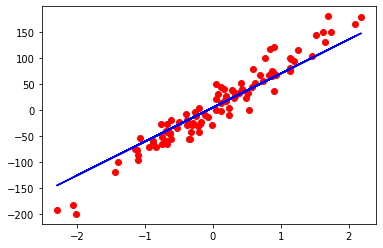

In [ ]:
'''
pipeline:

1) design model (input_size,output_size,forward_pass)
2) construct loss and optimizer
3) training loop over n_epochs:
    - forward pass: compute predictions
    - backward pass: compute gradients
    - update weights

'''

from sklearn import datasets
import matplotlib.pyplot as plt

# preparing dataset
X_npy, y_npy = datasets.make_regression(n_samples=100,
                                        n_features=1,
                                        noise=20,
                                        random_state=1)

# convert to tensor
X = torch.from_numpy(X_npy.astype(np.float32))
y = torch.from_numpy(y_npy.astype(np.float32))

y = y.view(y.shape[0],1) # reshape to column tensor

n_samples, n_features = X.shape
print(f'Nos of samples = {n_samples} \n Nos of features = {n_features}')

# 1) model declaration
input_size = n_features
output_size = 1

model = nn.Linear(input_size,output_size) 

# 2) loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.01)

# 3) training loop
n_epochs = 100

for epoch in range(n_epochs):
    # (i) forward pass and loss
    y_predicted = model(X)
    loss = criterion(y_predicted,y)

    # (ii) backward pass - gradients
    loss.backward()
    
    # (iii) update
    optimizer.step()
    optimizer.zero_grad()

    if epoch % 10 == 0:
        print(f'Epoch: {epoch},loss = {loss.item():.6f}')


predicted = model(X).detach().numpy() # removing from computation graph s.t. requires_grads=False

# plotting predictions
plt.plot(X_npy,y_npy,'ro')
plt.plot(X_npy,predicted,'b')
plt.show()

### Binary classification practical using Pytorch and standard scikit dataset

In [ ]:
# similar to LinearRegression, only changes to be made in model and criterion

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# prepare data - load preloaded dataset from scikit-learn
dataset = datasets.load_breast_cancer()

X,y = dataset.data, dataset.target # numpy arrays

n_samples, n_features = X.shape

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

# normalization (preprocessing data)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# convert to tensors
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

# reshape target labels to a column tensor
y_train = y_train.view(y_train.shape[0],1)
y_test = y_test.view(y_test.shape[0],1)

# 1) define model
class Classifier(nn.Module):
    def __init__(self,n_input_features):
        super(Classifier,self).__init__()
        self.Linear = nn.Linear(n_input_features,1)

    def forward(self,x):
        y_predicted = torch.sigmoid(self.Linear(x))
        return y_predicted

model = Classifier(n_features)

# 2) criterion and optimizer
criterion = nn.BCELoss() # binary_crossentropy_loss
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

# 3) training loop
num_epochs = 500

for epoch in range(num_epochs):
    # (i) forward pass and loss
    y_predicted = model(X_train)
    loss = criterion(y_predicted,y_train)

    # (ii) backward pass
    loss.backward()

    # (iii) update parameters
    optimizer.step()
    optimizer.zero_grad()

    if (epoch+1) % 10 == 0:
        print(f'Epoch: {epoch+1}, loss = {loss.item():.6f}')


# evaluation of model - need not track gradient history, hence torch.no_grad() is used
with torch.no_grad():
    y_predicted = model(X_test)
    y_predicted_cls = y_predicted.round() # >0.5 => 1 else 0
    correct = y_predicted_cls.eq(y_test).sum() # each correct pred => adds 1
    accuracy = correct/float(y_test.shape[0]) 
    print(f'Accuracy on test data = {accuracy:.4f}')


Epoch: 10, loss = 0.436395
Epoch: 20, loss = 0.263768
Epoch: 30, loss = 0.196911
Epoch: 40, loss = 0.162123
Epoch: 50, loss = 0.141761
Epoch: 60, loss = 0.128666
Epoch: 70, loss = 0.119357
Epoch: 80, loss = 0.112245
Epoch: 90, loss = 0.106558
Epoch: 100, loss = 0.101854
Epoch: 110, loss = 0.097867
Epoch: 120, loss = 0.094427
Epoch: 130, loss = 0.091420
Epoch: 140, loss = 0.088765
Epoch: 150, loss = 0.086399
Epoch: 160, loss = 0.084275
Epoch: 170, loss = 0.082356
Epoch: 180, loss = 0.080611
Epoch: 190, loss = 0.079017
Epoch: 200, loss = 0.077555
Epoch: 210, loss = 0.076207
Epoch: 220, loss = 0.074961
Epoch: 230, loss = 0.073804
Epoch: 240, loss = 0.072727
Epoch: 250, loss = 0.071722
Epoch: 260, loss = 0.070781
Epoch: 270, loss = 0.069898
Epoch: 280, loss = 0.069068
Epoch: 290, loss = 0.068286
Epoch: 300, loss = 0.067548
Epoch: 310, loss = 0.066849
Epoch: 320, loss = 0.066187
Epoch: 330, loss = 0.065559
Epoch: 340, loss = 0.064962
Epoch: 350, loss = 0.064393
Epoch: 360, loss = 0.063851
E